# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_excel('concrete_dataset.xlsx')

data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'Concrete compressive strength(MPa, megapascals)'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [12]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [13]:
reg = MLPRegressor(
    hidden_layer_sizes=(20),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=1000,
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [14]:
reg.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0, hidden_layer_sizes=20, learning_rate_init=0.01,
             max_iter=1000, momentum=0, solver='sgd')

## 6.3. Model's Weight & Bias

In [15]:
reg.coefs_

[array([[-0.40351238,  0.167937  ,  0.72622098,  1.1076546 ,  0.32151921,
          1.29517328,  0.31537514,  0.19144754,  0.04538176,  0.71182453,
          1.02879185,  0.69108356,  2.22628906,  0.56247694,  0.31145792,
          0.20334649,  3.44863405, -0.08123541,  3.713011  ,  0.09767124],
        [-0.37673175, -0.19236318, -0.06751718,  0.22254745,  0.41664109,
          0.80359082, -0.07632133,  0.24973287, -0.25641299,  0.36972122,
          0.7415547 ,  0.70354787,  1.2936917 ,  0.72699555, -0.37322809,
          0.03803042,  1.74845172,  0.21716014,  2.42408221, -0.21508546],
        [ 0.13101296, -0.07314475, -0.36175762,  0.58774346,  0.22267849,
          0.48390853, -0.11731681, -0.19273905,  0.15757176,  0.2524123 ,
          0.3070029 , -0.0723368 ,  0.47965644,  0.48649417, -0.30587033,
         -0.12070892,  1.27035348,  0.43790392,  0.84407832, -0.26787824],
        [ 0.20360057, -0.23078424,  0.16623114, -0.59184958, -0.23373158,
         -0.66868607, -0.04296969, 

In [16]:
reg.intercepts_

[array([-0.02283567, -0.41869453,  0.18673212,  0.4776398 ,  0.4316927 ,
         0.85244222, -0.16129223, -0.45479428, -0.10168966,  0.67150033,
         0.83302362,  0.19700751,  0.11612746,  0.3684645 , -0.10981896,
         0.3695995 ,  0.89569344, -0.37472309,  0.77055648, -0.23480932]),
 array([1.32904775])]

# 7. Prediction

## 7.1. Training Set

In [17]:
y_pred_train = reg.predict(X_train_scaled)

In [18]:
y_pred_train

array([33.06463069, 81.22248707, 33.42890935, 29.44555233, 37.84578707,
       28.04176549, 67.54100177, 23.63312464, 59.11016832, 37.35518451,
       38.59062623, 29.47618553, 64.09631589, 41.7770637 , 27.44355412,
       40.65587989, 32.51210365, 17.33326196, 34.40801785, 36.06288147,
       55.03401354, 25.60924907, 50.81165038, 54.50927864, 23.19124636,
       27.45157451, 39.38337958, 44.8079637 , 28.45648571, 45.24161282,
       50.34043015, 36.86113568, 39.43974273, 34.77906053, 37.07478099,
       35.65687751, 32.77311803, 57.51240905, 21.82139964, 27.28839847,
       79.85540673, 23.63044401, 62.09063551, 37.14824418, 38.64505554,
       24.70529468, 31.68920218, 41.12904323, 56.62888793, 24.07146352,
       29.91275664, 34.8693121 , 71.80660267, 30.43254259, 45.30553512,
       54.14116791, 30.33782861, 34.386864  , 63.48747918, 70.24123539,
       23.62015947, 32.90841655, 57.26230358, 18.23088963, 32.33269596,
       19.11257637, 23.06459167, 27.12117825, 39.03453528, 24.47

## 7.2. Test Set

In [19]:
y_pred_test = reg.predict(X_test_scaled)

In [20]:
y_pred_test

array([38.77764476, 62.76631066, 35.98768412, 23.26278715, 27.76273618,
       33.3507207 , 54.82258753, 47.65502204, 22.30434333, 37.73452786,
       35.82229094, 22.34526579, 62.58523845, 33.89356043, 41.76019475,
       55.61398344, 28.88130455, 51.69188359, 41.16424683, 75.48358787,
       32.19645667, 55.99154502, 42.62880061, 50.96438525, 24.00015593,
       52.91520005, 43.55269624, 26.42762743, 31.27316254, 59.28828896,
       34.52807377, 59.23083229, 33.69166737, 21.40133598, 26.85786285,
       60.34885104, 31.34803293, 32.71073174, 28.92216309, 28.58306267,
       58.15975223, 59.74770957, 29.54552516, 37.60202971, 34.73420556,
       41.43816483, 41.65526084, 25.26047763, 63.15411745, 37.16629737,
       22.72900849, 45.1261403 , 13.56611748, 45.39057168, 41.50101104,
       31.57725296, 35.60968849, 20.91298308, 35.27959571, 34.11740202,
       40.33965027, 43.4698355 , 53.60421771, 40.45839964, 65.25333631,
       66.32838754, 59.09860148, 34.91924801, 46.79891351, 62.96

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [21]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.5368711027121205
mean_squared_error =		 126.20895884883728
mean_absolute_error =		 8.895885482732787
mean_absolute_percentage_error = 0.3958500914983838


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

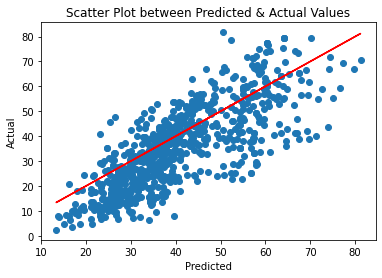

In [22]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [23]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.5482280000403603
mean_squared_error =		 136.5628996483941
mean_absolute_error =		 8.819307936167895
mean_absolute_percentage_error = 0.36539809692467734


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

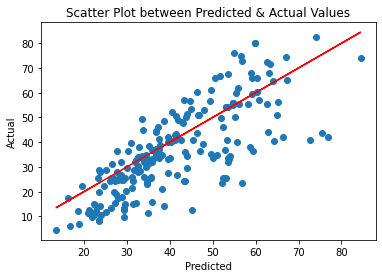

In [24]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((reg, 
             feature_name),  open('neural_network_regrssion_model.pickle', 'wb'))